In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os,re,time
from collections import Counter
from scipy import stats

In [2]:
path = os.getcwd()+'/'

In [3]:
data = pd.read_csv(path+'train.csv')

In [5]:
data.shape

(83767, 162)

In [4]:
data.head()

,Recordnum,cardnum_amount_avg_30,cardnum_amount_avg_15,cardnum_amount_avg_7,cardnum_amount_avg_3,cardnum_amount_avg_1,cardnum_amount_max_30,cardnum_amount_max_15,cardnum_amount_max_7,cardnum_amount_max_3,...,merchantnum_state_15,merchantnum_state_7,merchantnum_state_3,merchantnum_state_1,merchantnum_state_isna_30,merchantnum_state_isna_15,merchantnum_state_isna_7,merchantnum_state_isna_3,merchantnum_state_isna_1,Fraud
0,1,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,...,1,1,1,1,0,0,0,0,0,0
1,2,31.42,31.42,31.42,31.42,31.42,31.42,31.42,31.42,31.42,...,1,1,1,1,0,0,0,0,0,0
2,3,178.49,178.49,178.49,178.49,178.49,178.49,178.49,178.49,178.49,...,1,1,1,1,0,0,0,0,0,0
3,4,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,...,1,1,1,1,0,0,0,0,0,0
4,5,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,...,1,1,1,1,0,0,0,0,0,0


## KS

In [6]:
goods = data.query('Fraud == 0')
goods.shape

(83091, 162)

In [7]:
bads = data.query('Fraud == 1')
bads.shape

(676, 162)

In [8]:
start = time.time()

variables = np.array([])
scores = np.array([])
for v in data.columns[:-1]:
    variable = v
    ks = stats.ks_2samp(goods[v], bads[v])
    variables = np.hstack((variables,v))
    scores = np.hstack((scores,ks[0]))
end = time.time() 
print('time elapsed: {:.2f}'.format(end-start))

time elapsed: 2.40


In [9]:
scores[np.argsort(-scores)]

array([0.60386221, 0.60279067, 0.60211017, 0.60195619, 0.59304725,
       0.59247972, 0.59104349, 0.58908179, 0.58606797, 0.58411134,
       0.58244107, 0.5797654 , 0.57870226, 0.5783457 , 0.57641068,
       0.5724326 , 0.57049062, 0.56546042, 0.56400739, 0.56363633,
       0.56332805, 0.56216776, 0.56008729, 0.5598134 , 0.559689  ,
       0.5593178 , 0.55908158, 0.5587884 , 0.55874982, 0.55725531,
       0.55704463, 0.55686469, 0.55541657, 0.55203575, 0.55189235,
       0.55092577, 0.55011435, 0.54921867, 0.54908935, 0.54566153,
       0.54560906, 0.54551885, 0.54262887, 0.53991767, 0.53965753,
       0.53889961, 0.53841733, 0.53649884, 0.53150898, 0.52912416,
       0.52862058, 0.52640222, 0.52611933, 0.52487363, 0.52200712,
       0.52168521, 0.51838458, 0.51720964, 0.51510643, 0.51259039,
       0.51237144, 0.5116747 , 0.50834882, 0.50754237, 0.50608638,
       0.50562905, 0.50379179, 0.49972976, 0.49940596, 0.49810415,
       0.49511251, 0.49229023, 0.49061578, 0.48820951, 0.47998

In [10]:
variables[np.argsort(-scores)]

array(['cardnum_amount_sum_7', 'merchantnum_amount_week_diff_sum_3',
       'merchantnum_amount_sum_3', 'merchantnum_amount_sum_7',
       'merchantnum_amount_week_diff_max_1',
       'merchantnum_amount_month_diff_sum_3', 'merchantnum_amount_max_1',
       'merchantnum_amount_month_diff_max_1',
       'merchantnum_amount_week_diff_sum_1',
       'cardnum_amount_week_diff_sum_3', 'cardnum_amount_sum_3',
       'merchantnum_amount_month_diff_max_3', 'merchantnum_amount_max_3',
       'merchantnum_amount_month_diff_sum_1',
       'merchantnum_amount_week_diff_max_3',
       'cardnum_amount_month_diff_sum_3', 'merchantnum_amount_sum_1',
       'cardnum_amount_week_diff_sum_7', 'cardnum_amount_max_3',
       'cardnum_amount_week_diff_max_3', 'cardnum_amount_week_diff_max_1',
       'cardnum_amount_week_diff_sum_1',
       'cardnum_amount_month_diff_sum_7', 'merchantnum_amount_avg_1',
       'merchantnum_amount_week_diff_avg_1',
       'cardnum_amount_month_diff_max_3',
       'merchantnum_

## best variable

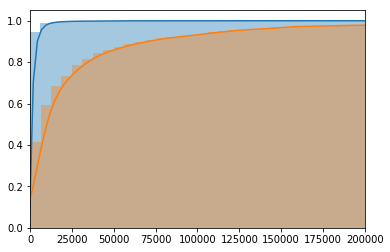

In [12]:
sns.distplot(goods['cardnum_amount_sum_7'],hist_kws={'cumulative': True}, kde_kws={'cumulative': True})
sns.distplot(bads['cardnum_amount_sum_7'],hist_kws={'cumulative': True}, kde_kws={'cumulative': True})
plt.xlim(0,200000)
plt.show()

## best non amount-related variable

In [13]:
[v for v in variables[np.argsort(-scores)] if 'amount' not in v][0]

'cardnum_7'

In [14]:
np.where(variables[np.argsort(-scores)]=='cardnum_7')

(array([87]),)

In [15]:
scores[np.argsort(-scores)][79]

0.46184779302709317

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/numeric.py:492: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


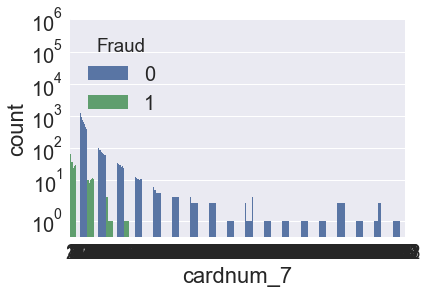

In [16]:
sns.set(font_scale=2)
ax = sns.countplot(x='cardnum_7', hue = 'Fraud',data = data)
ax.set(yscale='symlog')
ax.set_ylim([.1,1000000])
plt.show()

## worst variable

In [17]:
scores[np.argsort(-scores)][-1]

0.010133468125308397

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/numeric.py:492: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


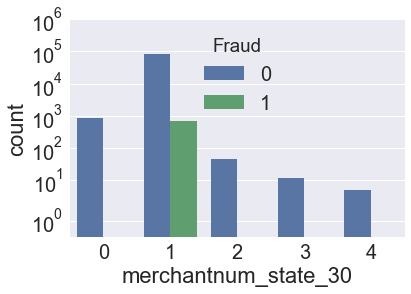

In [18]:
sns.set(font_scale=2)
ax = sns.countplot(x='merchantnum_state_30', hue = 'Fraud',data = data)
ax.set(yscale='symlog')
ax.set_ylim([.1,1000000])
plt.show()